## Problem Statement: Analyzing Daily Stock Data with Alpha Vantage API

### Overview
In this assignment, you will write a Python script to fetch and analyze daily time series stock data from the Alpha Vantage API for a set of prominent technology stocks (the "Mag 7" tickers). You will then convert the collected data into a pandas DataFrame for further analysis.

### Objectives
- **Data Retrieval:**  
  Use the `requests` library to retrieve daily stock data for the Mag 7 Tickers:

  **Mag 7 Tickers:**

**AAPL**: Apple Inc.
**MSFT**: Microsoft Corporation
**AMZN**: Amazon.com, Inc.
**GOOGL**: Alphabet Inc.
**META**: Meta Platforms, Inc.
**TSLA**: Tesla, Inc.
**NVDA**: Nvidia Corporation

- **API Interaction:**  
  For each stock ticker, construct the appropriate API URL using your Alpha Vantage API key and send an HTTP GET request.  
  Ensure that the API response is successful (HTTP status code 200).

- **Data Extraction:**  
  Extract the "Time Series (Daily)" portion of the JSON response.  
  Since the time series data is provided as a nested dictionary (with dates as keys), iterate over this dictionary.

- **Data Transformation:**  [An example/tutorial with code is provided to do this]
  For each date in the time series data:
  - Create a dictionary that includes the date, the stock ticker, and the day's data (such as open, high, low, close, and volume).
  - Use the dictionary `update` method to merge the date-specific data with the ticker information.
  - Append each resulting dictionary to a list to accumulate all the records.

- **Data Normalization:**  
  Convert the list of dictionaries into a pandas DataFrame.  
  This DataFrame will have columns corresponding to the date, ticker, and the daily stock data, making it easier to analyze the data further.

### Final Deliverable
Your final Python script should include:
- Import statements for `pandas` and `requests`.
- A defined list of stock tickers and your Alpha Vantage API key.
- A loop that iterates over each ticker to:
  - Construct the API URL.
  - Send a request to the API.
  - Process and transform the JSON response.
- Code that converts the accumulated list of dictionaries into a pandas DataFrame. [Provided to you]

By completing this assignment, you will demonstrate your ability to interact with APIs, process nested JSON data, and utilize pandas for data manipulation and analysis.


**get your API key from:** 
[https://www.alphavantage.co/support/#api-key](https://www.alphavantage.co/support/#api-key)

# 1: Import necessary modules

We need to import the `pandas` module for data manipulation and the `requests` module for making HTTP requests.

```python
import pandas as pd
import requests

In [3]:
import pandas as pd
import requests 

# 2: Define the list of stocks and API key

We need to define a list of stock symbols that we want to analyze and specify our Alpha Vantage API key.

```python
stocks = ['Ticker1', ... , 'Ticker7'] #Magnificent 7: Alphabet, Amazon, Apple, Meta, Microsoft, Nvidia, Tesla
api_key = 'your_api_key' # Get it from: https://www.alphavantage.co/support/#api-key

# 3: Initialize an empty list

We need to initialize an empty list `time_series_data` to store the time series data for each stock.

In [ ]:
time_series_data = []  # List to store data for all stocks



# 4: Fetch time series data

We need to loop over each stock symbol, construct the API URL, and make a GET request to that URL. If the response status is OK (200), we need to extract the time series data from the response and append it to `time_series_data`.

### 4.1: Construct the API URL

For each stock symbol, we need to construct the API URL.

```python
for stock in stocks:
    api_url = # Go to https://www.alphavantage.co/documentation/ and identify the API endpoint that allows you to retrive the daily data. When you are constructing the url use parameters: {stock}&apikey={api_key}'
```
### 4.2: Make the API request

We need to make a GET request to the API URL.

response = requests.get(api_url)

### 4.3: Check the response status

Check if the response status is OK (200). If it's not, we print an error message.

```python
if response.status_code == 200:
    ...
else:
    print(f"Error fetching data for {stock}: {response.status_code}")
```

### 4.4: Extract the time series data

If the response status is OK (200), we need to extract the time series data from the response.

```python
data = response.json()['Time Series (Daily)']

# Tutorial -- unrelated to the assignment but try to understand and adapt the following example to your use case. Note that the data structure is a dictionary and for each key, we have a dictionary as the value:

student_data = {
    '001': {'Big Data': 'A', 'Machine Learning': 'B', 'AI': 'A', 'Database Management': 'B'},
    '002': {'Big Data': 'B', 'Machine Learning': 'A', 'AI': 'B', 'Database Management': 'A'},
    '003': {'Big Data': 'A', 'Machine Learning': 'A', 'AI': 'B', 'Database Management': 'B'}
}
```

#### This is how you can iterate over student_data:
```python
all_student_data = []
for student_id, grades in student_data.items():b
    row = {'student_id': student_id}
    row.update(grades)
    all_student_data.append(row)
```

The `update` method on a dictionary merges the key-value pairs from one dictionary into another. Here's what happens step by step:

1. **Merging Dictionaries:**
   - When you call `row.update(grades)`, Python takes every key-value pair from the `grades` dictionary and adds it to the `row` dictionary.
   - If `row` already contains a key that exists in `grades`, the corresponding value in `row` will be overwritten by the value from `grades`.

2. **Example:**

   ```python
   row = {'student_id': '001'}
   grades = {'Big Data': 'A', 'Machine Learning': 'B', 'AI': 'A', 'Database Management': 'B'}
   row.update(grades)
   # Now, row becomes:
   # {'student_id': '001', 'Big Data': 'A', 'Machine Learning': 'B', 'AI': 'A', 'Database Management': 'B'}
    ```

```python
df = pd.DataFrame(all_student_data)
df
```

Output:

| student_id | Big Data | Machine Learning | AI | Database Management |
|------------|----------|------------------|----|---------------------|
| 001        | A        | B                | A  | B                   |
| 002        | B        | A                | B  | A                   |
| 003        | A        | A                | B  | B                   |



In [22]:
# Your solution here. Make sure to look at the examples discussed in class and also, it is very important you understand the student/grades example in the previous cell


In [24]:
## This is how the final dataframe looks like. Note that the values for Date may vary depending on when you run the code.

,date,ticker,1. open,2. high,3. low,4. close,5. volume
0,2025-03-07,AAPL,235.2400,241.3700,234.7600,239.0700,46020966
1,2025-03-06,AAPL,234.4350,237.8600,233.1581,235.3300,45170419
2,2025-03-05,AAPL,235.4200,236.5500,229.2300,235.7400,47227643
3,2025-03-04,AAPL,237.7050,240.0700,234.6800,235.9300,53798062
4,2025-03-03,AAPL,241.7900,244.0272,236.1120,238.0300,47183985
...,...,...,...,...,...,...,...
195,2024-10-17,NVDA,139.3400,140.8900,136.8700,136.9300,306435921
196,2024-10-16,NVDA,133.9800,136.6200,131.5800,135.7200,264879720
197,2024-10-15,NVDA,137.8700,138.5700,128.7400,131.6000,377831021
198,2024-10-14,NVDA,136.4700,139.6000,136.3000,138.0700,232347668


In [2]:
# Remove numbers and periods from column names and convert to lowercase
df.columns = df.columns.str.replace('[0-9.]', '', regex=True).str.strip().str.lower()

# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

df

,date,ticker,open,high,low,close,volume
0,2025-03-07,AAPL,235.2400,241.3700,234.7600,239.0700,46207306
1,2025-03-06,AAPL,234.4350,237.8600,233.1581,235.3300,45170419
2,2025-03-05,AAPL,235.4200,236.5500,229.2300,235.7400,47227643
3,2025-03-04,AAPL,237.7050,240.0700,234.6800,235.9300,53798062
4,2025-03-03,AAPL,241.7900,244.0272,236.1120,238.0300,47183985
...,...,...,...,...,...,...,...
195,2024-10-17,NVDA,139.3400,140.8900,136.8700,136.9300,306435921
196,2024-10-16,NVDA,133.9800,136.6200,131.5800,135.7200,264879720
197,2024-10-15,NVDA,137.8700,138.5700,128.7400,131.6000,377831021
198,2024-10-14,NVDA,136.4700,139.6000,136.3000,138.0700,232347668


# Appendix 2: Generate Plots [Not part of Grading]

# Generate Plots. Used ChatGPT with the following prompt. Visualization is not the scope of the lecture.

**Prompt:**

Generate individual interactive stock charts for each unique ticker symbol contained within a pandas DataFrame using Plotly in Python. Each stock chart should display the closing price and trading volume over time on the same plot, with the closing price on the primary y-axis and volume on the secondary y-axis. Both y-axes should start from zero to accurately reflect the scale of the data. The plots should be professional-looking, suitable for a business analytics presentation.

**Code:**

Make sure you have *plotly* installed. You can install via Anaconda prompt by entering: *pip intall plotly* after activating your environment, or you can install by running the cell below (uncomment first)

#!pip install plotly

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the DataFrame by 'ticker'
grouped = df.groupby('ticker')

# Iterate over each group
for ticker, data in grouped:
    # Create a figure with secondary y-axis for each ticker
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add closing price trace
    fig.add_trace(
        go.Scatter(x=data['date'], y=data['close'].astype(float), name=f"{ticker} Close Price", line=dict(color='royalblue')),
        secondary_y=False,
    )

    # Add volume trace
    fig.add_trace(
        go.Scatter(x=data['date'], y=data['volume'].astype(float), name=f"{ticker} Volume", line=dict(color='tomato', dash='dot')),
        secondary_y=True,
    )

    # Add figure title and adjust layout for each ticker
    fig.update_layout(
        title_text=f"{ticker} Stock Closing Prices and Volume",
        xaxis_title="Date",
        template="plotly_white",
    )

    # Set x-axis properties
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

    # Set y-axes titles and make them start from 0
    fig.update_yaxes(title_text=f"<b>{ticker} Close Price</b>", secondary_y=False, showline=True, linewidth=2, linecolor='blue', mirror=True, rangemode='tozero')
    fig.update_yaxes(title_text=f"<b>{ticker} Volume</b>", secondary_y=True, showline=True, linewidth=2, linecolor='red', mirror=True, rangemode='tozero')

    # Show plot for each ticker
    fig.show()


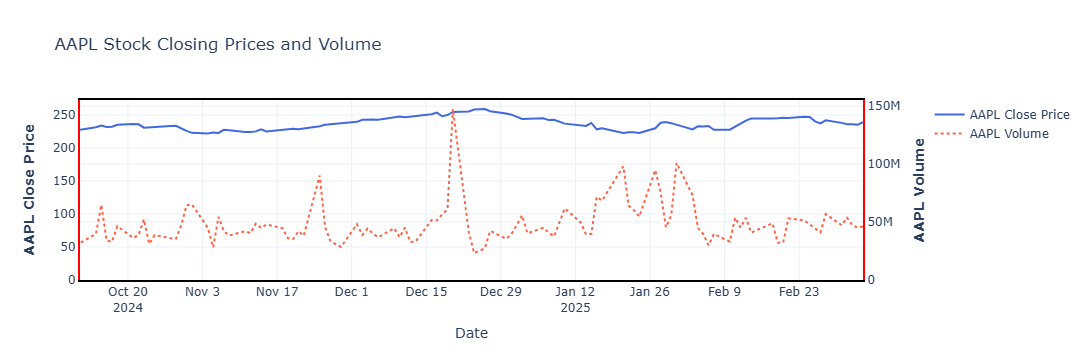

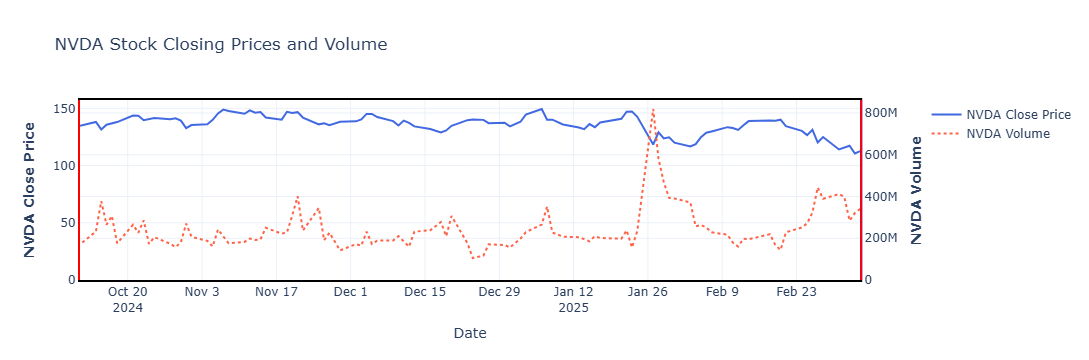

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the DataFrame by 'ticker'
grouped = df.groupby('ticker')

# Iterate over each group
for ticker, data in grouped:
    # Create a figure with secondary y-axis for each ticker
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add closing price trace
    fig.add_trace(
        go.Scatter(x=data['date'], y=data['close'].astype(float), name=f"{ticker} Close Price", line=dict(color='royalblue')),
        secondary_y=False,
    )

    # Add volume trace
    fig.add_trace(
        go.Scatter(x=data['date'], y=data['volume'].astype(float), name=f"{ticker} Volume", line=dict(color='tomato', dash='dot')),
        secondary_y=True,
    )

    # Add figure title and adjust layout for each ticker
    fig.update_layout(
        title_text=f"{ticker} Stock Closing Prices and Volume",
        xaxis_title="Date",
        template="plotly_white",
    )

    # Set x-axis properties
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

    # Set y-axes titles and make them start from 0
    fig.update_yaxes(title_text=f"<b>{ticker} Close Price</b>", secondary_y=False, showline=True, linewidth=2, linecolor='blue', mirror=True, rangemode='tozero')
    fig.update_yaxes(title_text=f"<b>{ticker} Volume</b>", secondary_y=True, showline=True, linewidth=2, linecolor='red', mirror=True, rangemode='tozero')

    # Show plot for each ticker
    fig.show()


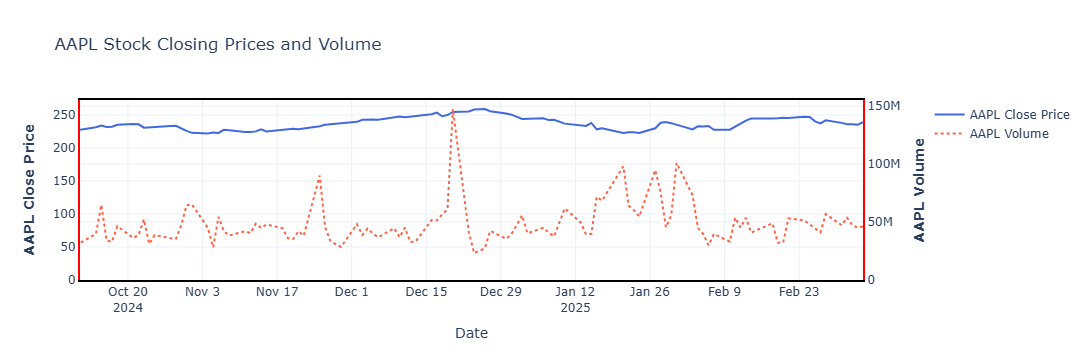

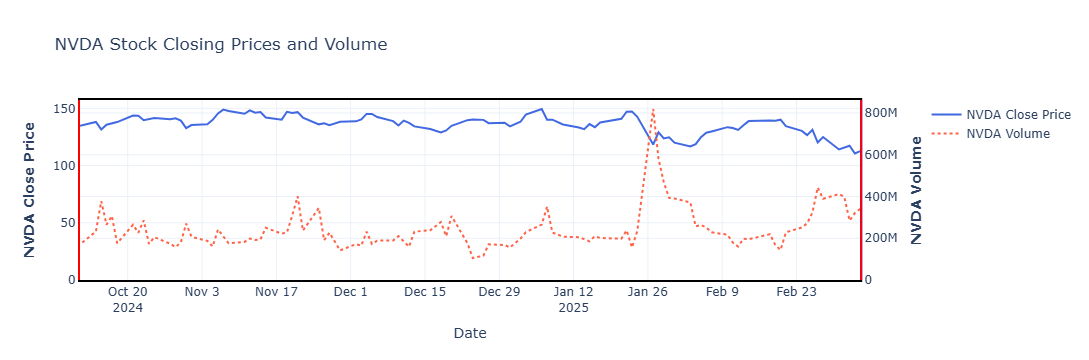

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the DataFrame by 'ticker'
grouped = df.groupby('ticker')

# Iterate over each group
for ticker, data in grouped:
    # Create a figure with secondary y-axis for each ticker
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add closing price trace
    fig.add_trace(
        go.Scatter(x=data['date'], y=data['close'].astype(float), name=f"{ticker} Close Price", line=dict(color='royalblue')),
        secondary_y=False,
    )

    # Add volume trace
    fig.add_trace(
        go.Scatter(x=data['date'], y=data['volume'].astype(float), name=f"{ticker} Volume", line=dict(color='tomato', dash='dot')),
        secondary_y=True,
    )

    # Add figure title and adjust layout for each ticker
    fig.update_layout(
        title_text=f"{ticker} Stock Closing Prices and Volume",
        xaxis_title="Date",
        template="plotly_white",
    )

    # Set x-axis properties
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

    # Set y-axes titles and make them start from 0
    fig.update_yaxes(title_text=f"<b>{ticker} Close Price</b>", secondary_y=False, showline=True, linewidth=2, linecolor='blue', mirror=True, rangemode='tozero')
    fig.update_yaxes(title_text=f"<b>{ticker} Volume</b>", secondary_y=True, showline=True, linewidth=2, linecolor='red', mirror=True, rangemode='tozero')

    # Show plot for each ticker
    fig.show()


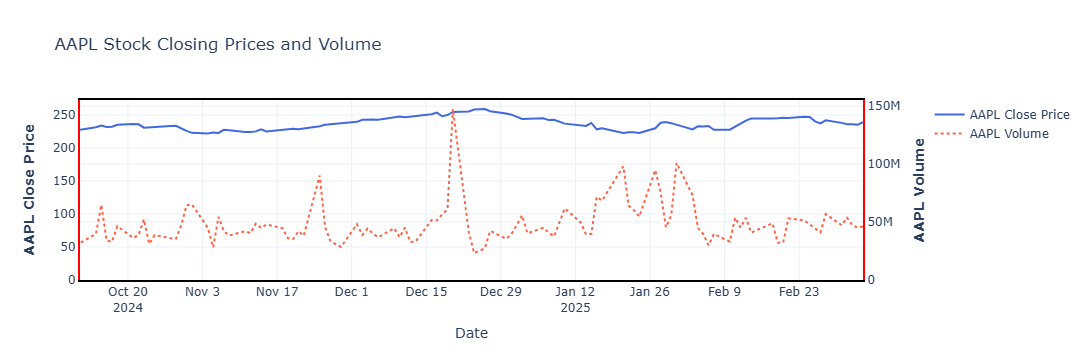

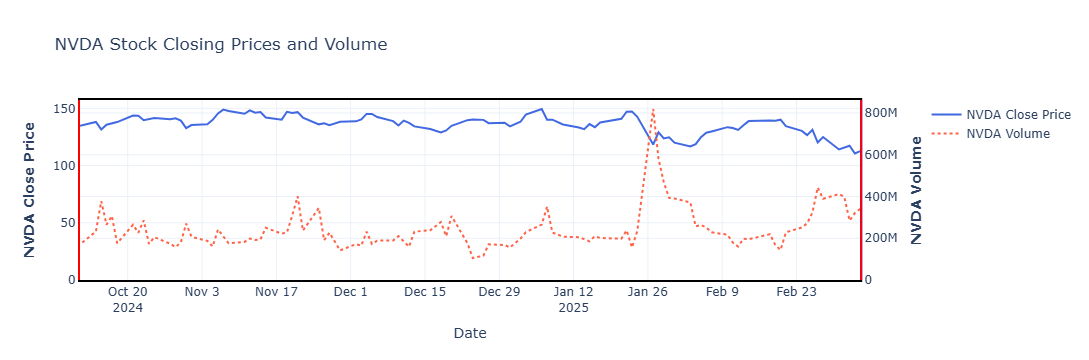

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Group the DataFrame by 'ticker'
grouped = df.groupby('ticker')

# Iterate over each group
for ticker, data in grouped:
    # Create a figure with secondary y-axis for each ticker
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add closing price trace
    fig.add_trace(
        go.Scatter(x=data['date'], y=data['close'].astype(float), name=f"{ticker} Close Price", line=dict(color='royalblue')),
        secondary_y=False,
    )

    # Add volume trace
    fig.add_trace(
        go.Scatter(x=data['date'], y=data['volume'].astype(float), name=f"{ticker} Volume", line=dict(color='tomato', dash='dot')),
        secondary_y=True,
    )

    # Add figure title and adjust layout for each ticker
    fig.update_layout(
        title_text=f"{ticker} Stock Closing Prices and Volume",
        xaxis_title="Date",
        template="plotly_white",
    )

    # Set x-axis properties
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

    # Set y-axes titles and make them start from 0
    fig.update_yaxes(title_text=f"<b>{ticker} Close Price</b>", secondary_y=False, showline=True, linewidth=2, linecolor='blue', mirror=True, rangemode='tozero')
    fig.update_yaxes(title_text=f"<b>{ticker} Volume</b>", secondary_y=True, showline=True, linewidth=2, linecolor='red', mirror=True, rangemode='tozero')

    # Show plot for each ticker
    fig.show()


## Problem Statement: Part II – Storing Data in a Local Database

### Overview
In this part of the assignment, you will extend your solution from Part I by storing the stock market data (contained in a pandas DataFrame) into a MySQL database on your local machine. You will create a new database and table to hold the market data, insert the data from your DataFrame into the table, and then verify that the data has been stored correctly by querying the database.

### Objectives
1. **Database and Table Creation:**
   - Connect to your local MySQL server using Python.
   - Create a new database (e.g., `assignment2_alphavantage`). If the database already exists, you may choose to drop and recreate it to ensure a fresh start.
   - Within the newly created database, create a table (e.g., `MarketData`) designed to store market information. The table should include columns for:
     - A unique identifier (primary key)
     - Stock ticker symbol
     - Date
     - Open, High, Low, Close prices (using an appropriate numeric data type)
     - Volume (as a large integer)
     - Additional fields if necessary (e.g., after-hours or pre-market prices, if applicable)

2. **Storing Data into the Database:**
   - Use SQLAlchemy to establish a connection to your MySQL database.
   - Insert the data from your previously created DataFrame (from Part I) into the `MarketData` table using the DataFrame's `to_sql` method.
   - Consider the appropriate option for the `if_exists` parameter (for example, `append` to add data to an existing table).

3. **Data Verification:**
   - Query the `MarketData` table to retrieve the stored data.
   - Use pandas to load the query result into a DataFrame and display it, verifying that the data has been correctly stored in the database.

### Hints and Considerations
- **Database Connection:**
  - Use the `pymysql` package in combination with SQLAlchemy to connect to your MySQL database.
  - Make sure you have the necessary credentials (e.g., username, password) and that your MySQL server is running on `localhost`.

- **Table Schema:**
  - Ensure that the data types chosen for each column in your table align with the data types in your DataFrame (e.g., dates, decimals, integers).

- **Error Handling:**
  - Consider wrapping your database operations in try/finally blocks to ensure that connections are properly closed.

- **Testing:**
  - After inserting the data, run a simple SQL query (e.g., `SELECT * FROM MarketData`) to load the data into a DataFrame and verify that it matches your original dataset.

### Deliverables
- A Python script that:
  1. Creates a MySQL database and a table for market data.
  2. Inserts data from your DataFrame (obtained in Part I) into the database table.
  3. Queries the database to retrieve and display the stored data.

By completing Part II, you will demonstrate proficiency in integrating data processing with persistent storage, bridging the gap between data retrieval, manipulation, and database management.


In [ ]:
## 1. Connecting to database engine and creating the Database

import pymysql.cursors

# Configuration
config = {
    'host': 'localhost',
    'user': 'your_mysql_username',  # Replace with your MySQL username
    'password': 'your_mysql_password',  # Replace with your MySQL password
    'db': 'mysql',  # Initially connect to the default 'mysql' database to create a new database
    'charset': 'utf8mb4',
    'cursorclass': pymysql.cursors.DictCursor
}

# Connect to the database
connection = pymysql.connect(**config)

try:
    with connection.cursor() as cursor:
        # Create a new database for financial data
        cursor.execute("DROP DATABASE finance_data")
        cursor.execute("CREATE DATABASE IF NOT EXISTS finance_data")
        cursor.execute("USE finance_data")
        
        # Create MarketData Table
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS MarketData (
            #Database table specs for storing market data GO HERE
        )""")
        
    # Commit the changes
    connection.commit()
finally:
    # Close the connection to ensure it's not left open
    connection.close()

print("Database and table for market data created successfully.")

In [ ]:
# Output

Database and table for market data created successfully.


In [ ]:
# 2. Insert Data into the Database
# Assuming 'df' is your DataFrame containing the market data
# Ensure you have the necessary libraries installed
# pip install pandas sqlalchemy pymysql

#To do: 
# 
# You just need to update the database connection details

# Import necessary libraries
import pandas as pd
import pymysql
from sqlalchemy import create_engine

# Database connection details
username = #your mysql_username
password = #your mysql_password
host = #'localhost'  # or your MySQL server address
database_name = 'assignment2_alphavantage'
table_name = 'MarketData'

# SQLAlchemy engine for MySQL connection
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database_name}')

# Use to_sql method to insert data into the MarketData table
df.to_sql(name=table_name, con=engine, if_exists='append', index=False)

# 'if_exists' parameter options:
# 'fail': Raises an error if the table exists.
# 'replace': Drops the table before inserting new values (be careful with this option).
# 'append': Inserts new values into the existing table. Suitable for most use cases.

In [5]:
# Output

Data inserted into the MarketData table successfully.


In [6]:
# 3. Querying the Database

# Assuming you have a table named 'MarketData' structured for market information
sql_query = 'Your SQL query here'

# Use Pandas to query the database
df = pd.read_sql(sql_query, engine)

# Display the DataFrame
df


,id,ticker,date,open,high,low,close,volume
0,1,AAPL,2025-03-07,235.24,241.37,234.76,239.07,46240156
1,2,AAPL,2025-03-06,234.44,237.86,233.16,235.33,45170419
2,3,AAPL,2025-03-05,235.42,236.55,229.23,235.74,47227643
3,4,AAPL,2025-03-04,237.71,240.07,234.68,235.93,53798062
4,5,AAPL,2025-03-03,241.79,244.03,236.11,238.03,47183985
...,...,...,...,...,...,...,...,...
695,696,NVDA,2024-10-17,139.34,140.89,136.87,136.93,306435921
696,697,NVDA,2024-10-16,133.98,136.62,131.58,135.72,264879720
697,698,NVDA,2024-10-15,137.87,138.57,128.74,131.60,377831021
698,699,NVDA,2024-10-14,136.47,139.60,136.30,138.07,232347668


**Done! Great job!**